# Aprendizado Supervisionado 

## SVM

Neste tutorial vamos trabalhar com o algoritmo do SVM. Este material é baseado nos seguintes links: 

* **SVM Tutorial: ** [https://www.svm-tutorial.com/](https://www.svm-tutorial.com/)
* **Série de 3 tutoriais baseados no curso da Udacity: ** [https://justinmaes.wordpress.com/category/udacity-intro-to-machine-learning/support-vector-machine-svm/](https://justinmaes.wordpress.com/category/udacity-intro-to-machine-learning/support-vector-machine-svm/)
* **Curso de Machine Learning da Udacity: ** [https://br.udacity.com/course/intro-to-machine-learning--ud120/](https://br.udacity.com/course/intro-to-machine-learning--ud120/)

O SVM é mais um método de classificação. Neste caso, mais especificamente, para problemas que possuem duas classes. Ele pode ser aplicado para problemas com mais de 2 classes, mas, neste caso, o algoritmo possui um alto custo computacional. Esse tipo de classificador não vai ser objeto de estudo deste tutorial. 

Para começar a enteder o SVM, vamos partir de um exemplo.

### Exemplo 1

Considere o seguinte conjunto de dados. 

*Exemplo retirado [deste link](http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html)*

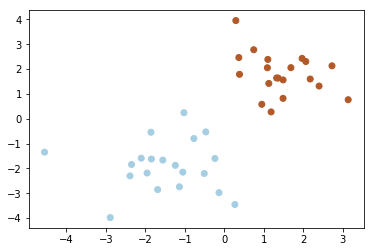

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from IPython.display import YouTubeVideo, Image

%matplotlib inline

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

O objetivo do SVM é encontrar um hyperplano que seja capaz de separar os dados de cada uma das classes. Na verdade, ele encontra, dentre todos os possíveis hyperplanos de separação, aquele que melhor separa as classes. No nosso exemplo, como estamos trabalhando com duas dimensões, o hyperplano é representado por uma reta.

Vamos treinar um modelo a partir do SVM e plotar o hyperplano para os dados do gráfico anterior.

In [5]:
# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

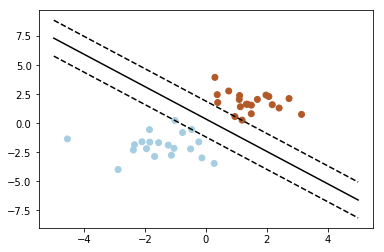

In [6]:
# Plota o hyperplano

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()

A imagem anterior exibe o hyperplano (a reta) criada para separar os dados. As linhas pontilhadas representam as fronteiras de cada classe. Elas passam pelos pontos que representam os *support vectors* de cada classe. A linha preenchida é o hyperplano de separação. O objetivo é maximizar a distância entre as classes representadas pelos hyperplanos pontilhados. 

Um aprofundamento matemático de como o SVM funciona pode ser encontrado [neste link](https://www.svm-tutorial.com/2014/11/svm-understanding-math-part-1/). Vale muito a pena dar uma olhada. Alguns pontos abordados a seguir foram retirados desta série de tutorial. No entanto, nesses primeiros tutoriais não tenho o objetivo de aprofundar todos os conceitos matemáticos dos modelos.

## Definindo o SVM

> Uma máquina de vetores de suporte (SVM, do inglês: *support vector machine*) é um conceito na ciência da computação para um conjunto de métodos do aprendizado supervisionado que analisam os dados e reconhecem padrões, usado para classificação e análise de regressão. O SVM padrão toma como entrada um conjunto de dados e prediz, para cada entrada dada, qual de duas possíveis classes a entrada faz parte, o que faz do SVM um classificador linear binário não probabilístico. 
>> Fonte: [Wikipedia](https://pt.wikipedia.org/wiki/M%C3%A1quina_de_vetores_de_suporte)


Sendo assim, o objetivo do SVM é encontrar um hyperplano de separação ótimo que maximiza as margens do dado de treinamento. No entanto, é fácil perceber que existem vários hyperplanos que podem serparar os dados. Vamos ver alguns exemplos que ilustra isso. 

Imagens retiradas do tutorial: [https://www.svm-tutorial.com/2014/11/svm-understanding-math-part-1/](https://www.svm-tutorial.com/2014/11/svm-understanding-math-part-1/)

Considere a imagem a seguir:

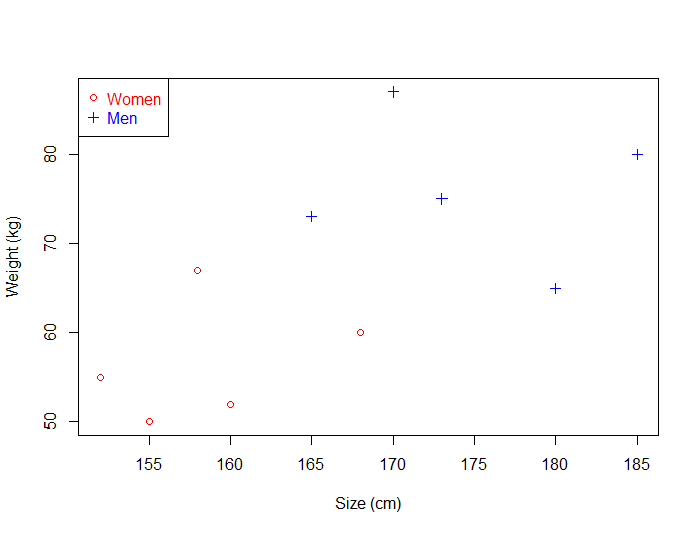

In [7]:
from IPython.display import Image
from IPython.display import display
Image("https://www.svm-tutorial.com/wp-content/uploads/2014/11/01_svm-dataset1.png", width=500)

É fácil perceber que existem vários hyperplanos que separam esse conjunto de dados. 

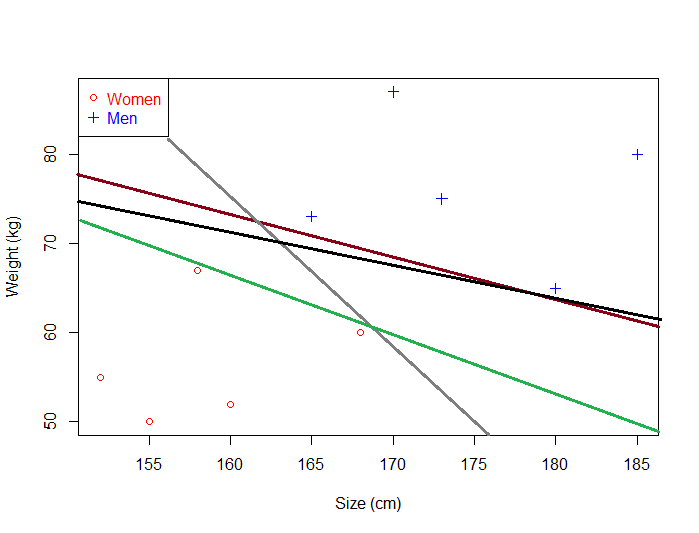

In [8]:
Image("https://www.svm-tutorial.com/wp-content/uploads/2014/11/01_svm-dataset1-separated-2.png", width=500)

O hyperplano escolhido pelo SVM deve generalizar a classificação de dados não vistos ainda. É importante selecionar o hyperplano correto. Vamos supor que o SVM escolha o hyperplano verde e usa-o para classificar novos dados:

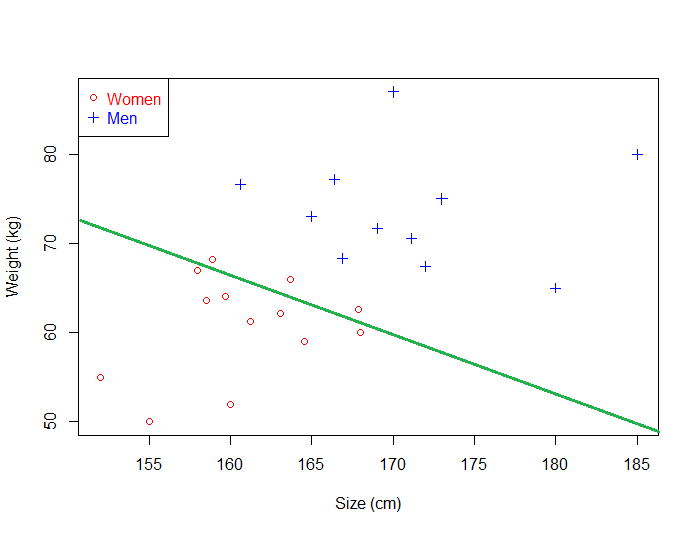

In [12]:
Image("https://www.svm-tutorial.com/wp-content/uploads/2014/11/01_svm-dataset1-separated-bad.png", width=500)

Observe que ele classfica de forma errada algumas instâncias das mulheres. Isso acontece porque ele pegou um hyperplano que está muito próximo da fronteira da classe *mulher*. Sendo assim, a probabilidade de classificar erroneamente instâncias que seriam mulher aumenta. O mesmo aconteceria se fosse selecionado um hyperplano muito próximo da classe *homem*. Neste caso, a probabilidade de classificar erroneamente instâncias de homens seria maior. 

Desta forma, o ideal é que o SVM selecione um hyperplano que seja o mais distante possível de cada categoria de classificação. Como mostra a imagem a seguir:

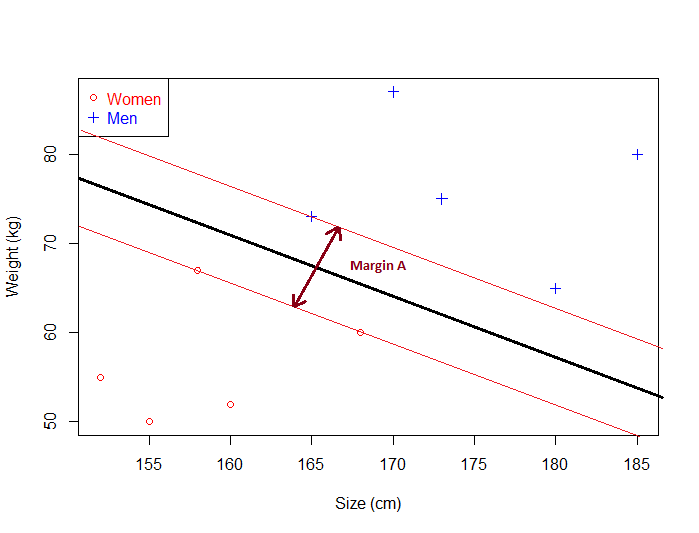

In [13]:
Image("https://www.svm-tutorial.com/wp-content/uploads/2014/11/07_withMidpointsAndSeparator1.png", width=500)

Ou seja, ele quer maximizar o que chamamos de *Margin* (ou fronteira). De forma geral, quando o SVM otimiza a escolha do hyperplano ele garante que os dados de treinamento foram classificados corretamente e seleciona um hyperplano que melhor generaliza os dados não vistos. No entanto, vamos ver mais a frente que isso depende de outros fatores como alguns parâmetros que serão trabalhados.

Vale ressaltar que o SVM dar preferência por hyperplanos que classifiquem corretamente os dados de treinamento e em seguida o critério de maximizar a margem entre as classes. Para deixar mais claro esse conceitos, vamos analisar a imagem a seguir.

Imagem retiradas de: [https://justinmaes.wordpress.com/category/udacity-intro-to-machine-learning/support-vector-machine-svm/](https://justinmaes.wordpress.com/category/udacity-intro-to-machine-learning/support-vector-machine-svm/)

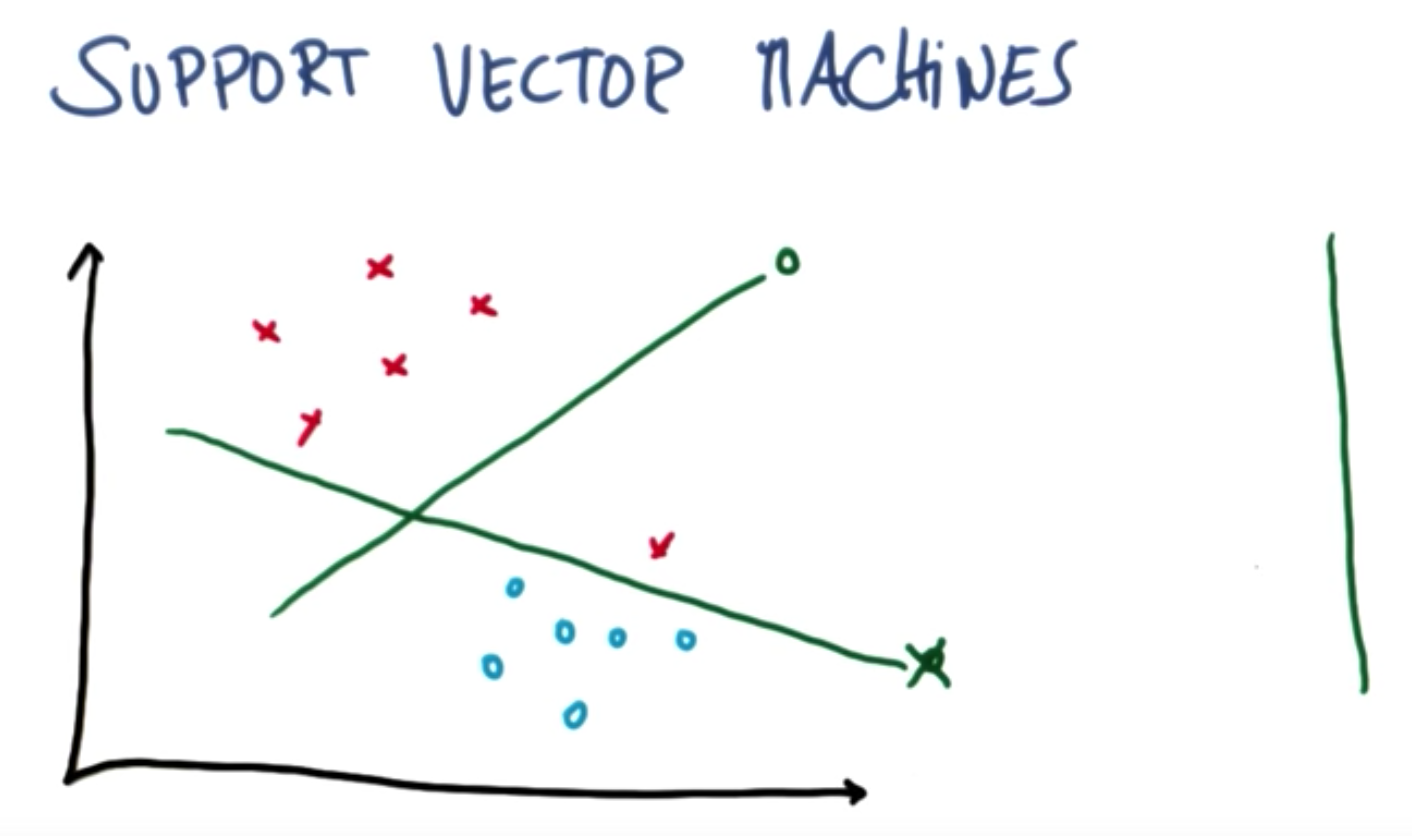

In [11]:
Image("https://justinmaes.files.wordpress.com/2016/10/screen-shot-2016-10-09-at-5-00-24-am.png", width=500)

A reta identificada pelo **o** maximiza melhor a distância entre as classes. No entanto, ela permite classificar uma instância de treinamento de forma errada. Diferente da reta com o **x**, onde mesmo que a distância das fronteiras seja menor, ela garante a classificação correta de todas as instâncias de treinamento. Sendo assim, o SVM leva primeiro em consideração a classificação correta da base e em seguida a distância entre as fronteiras. Se isso não fosse verdade, a reta vertical ao lado do gráfico seria uma boa solução já que ela maximiza a distância entre as duas classes. 

## Separando dados não-lineares

Vamos olhar para o seguinte conjunto de dados:

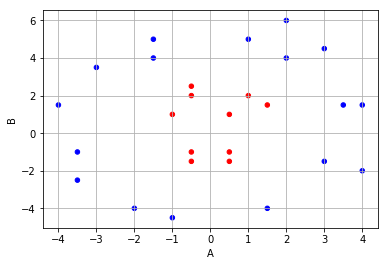

In [16]:
data = pd.read_csv("https://dl.dropboxusercontent.com/u/25405260/dataset/toyexample1.csv", sep=";")

colors = {0:'red', 1:'blue'}

# Plotagem dos valores da base de treinamento
data.plot(kind='scatter', x='A', y='B',c=data['Classe'].apply(lambda x: colors[x]),grid=True) 

É possível separar tais dados linearmente? Em outras palavras, é possível definir um hyperplano capaz de separar os dados das duas classes?

Nitidamente, vemos que não é possível.

Agora, vamos calcular uma nova *feature* para o gráfico. Essa *feature* será identificada por Z e consiste de $x^2 + y^2$ (a distância de um ponto para a origem).

In [17]:
import math

def new_value(row):
    return math.pow(row['A'], 2) + math.pow(row['B'], 2)


data['Z'] = data.apply(lambda row: new_value(row),axis=1)

Vamos plotar agora a nova dimensão e o eixo A. O que aconteceu? É possível separa-los linearmente?

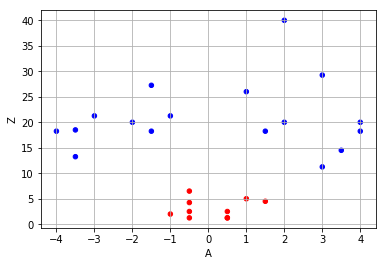

In [18]:
data.plot(kind='scatter', x='A', y='Z',c=data['Classe'].apply(lambda x: colors[x]),grid=True) 

Sim. Conseguimos com um hyperplano separar o que é vermelho e o que é azul.

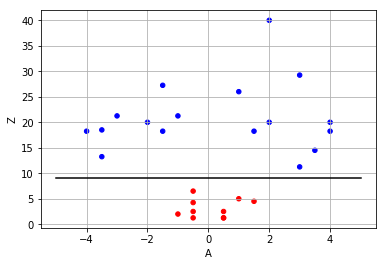

In [19]:
data.plot(kind='scatter', x='A', y='Z',c=data['Classe'].apply(lambda x: colors[x]),grid=True) 
xx = [-5, 5]
yy = [9, 9]
plt.plot(xx, yy, 'k-')

No grafo original, essa separação corresponde a um círculo que separa os dois conjunto de dados. 

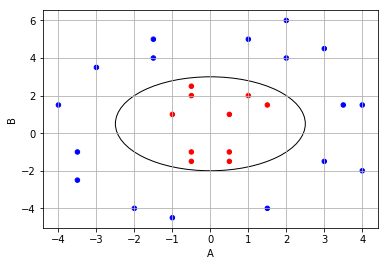

In [20]:
data.plot(kind='scatter', x='A', y='B',c=data['Classe'].apply(lambda x: colors[x]),grid=True) 
circle1 = plt.Circle((0, 0.5), 2.5, color='k',fill=False)
fig = plt.gcf()
ax = fig.gca()
ax.add_artist(circle1)

O vídeo a seguir ilustra esse processo:

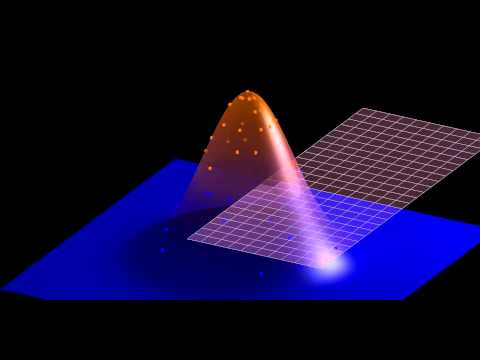

In [22]:
YouTubeVideo("9NrALgHFwTo")

Vamos considerar um outro exemplo:

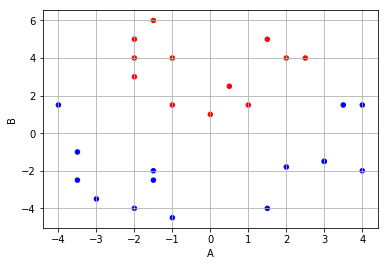

In [23]:
data = pd.read_csv("https://dl.dropboxusercontent.com/u/25405260/dataset/toyexample2.csv", sep=";")
data

colors = {0:'red', 1:'blue'}

# Plotagem dos valores da base de treinamento
data.plot(kind='scatter', x='A', y='B',c=data['Classe'].apply(lambda x: colors[x]),grid=True) 

Mais uma vez é fácil ver que este conjunto de dados não pode ser separado de forma linear. 

Agora, vamos calcular uma nova *feature* para o gráfico. Essa *feature* será identificada por Z e consiste de |x| (módulo de x), neste caso.

In [24]:
import math

def new_value(row):
    return math.fabs(row['A'])


data['Z'] = data.apply(lambda row: new_value(row),axis=1)

Plotando a nova feature, temos o grafo a seguir:

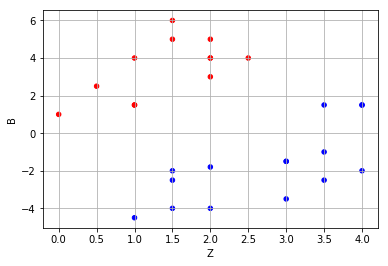

In [25]:
data.plot(kind='scatter', x='Z', y='B',c=data['Classe'].apply(lambda x: colors[x]),grid=True) 

Que pode ser separado linearmente.

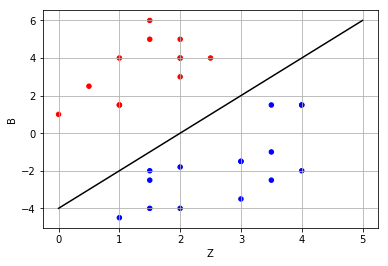

In [26]:
data.plot(kind='scatter', x='Z', y='B',c=data['Classe'].apply(lambda x: colors[x]),grid=True) 
xx = [0, 5]
yy = [-4, 6]
plt.plot(xx, yy, 'k-')

No grafo original, essa separação corresponde a duas retas que separam os dados.

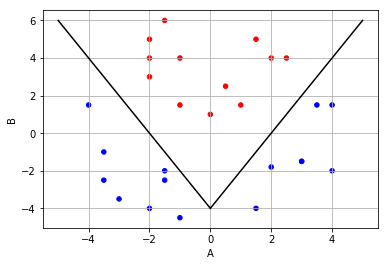

In [27]:
data.plot(kind='scatter', x='A', y='B',c=data['Classe'].apply(lambda x: colors[x]),grid=True) 
xx = [0, -5]
yy = [-4, 6]
xx_ = [0,5]
yy_ = [-4,6]
plt.plot(xx, yy, 'k-')
plt.plot(xx_, yy_, 'k-')

Esses dois exemplos dão uma idéia geral de como a mudança de dimensão dos dados pode auxiliar no propósito de separação destes. Essa adição de uma nova *feature* é um recurso bastante útil. No entanto, como saber qua *feature* deve ser utiizada? A vantagem é que não precisamos saber e isso se dar por conta do que é chamada de *kernel trick*. Uma breve (em 1 min) explicação disso pode ser encontrada no vídeo a seguir.

*Ative a legenda em português*

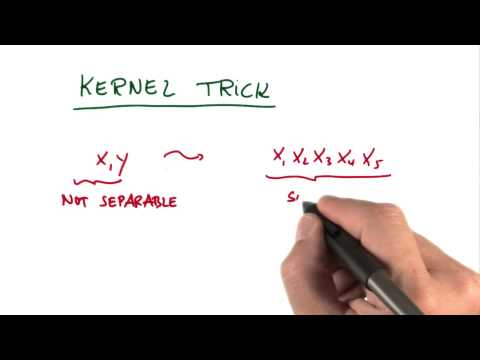

In [28]:
YouTubeVideo("3Xw6FKYP7e4")

Uma função de kernel pega um espaço de entrada (características) de baixa dimensão e mapeia-o para um espaço dimensional muito alto. Desta forma, o que anteriormente não era linearmente separável torna-se linearmente separável usando SVM. Por fim, a solução é trazida de volta para o espaço original, o que resulta em uma separação não-linear.

## Entendendo os parâmetros do SVM

Todos os métodos de aprendizagem estudados possuem uma série de parâmetros que devem ser configurados a medida que os testes forem executados. Mais para frente vamos estudar um método que permite otimizar estes parâmetros: [GridSearch](http://scikit-learn.org/stable/modules/grid_search.html). Por enquanto vamos apenas modificar alguns parâmetros e estudar o reflexo destas alterações na acurácia do modelo. 

Voltemos ao exemplo mostrado no início do tutorial.

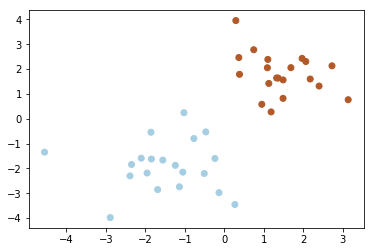

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

Vamos variar o parâmetro **C**. Esse parâmetro controla o *tradeoff* entre uma fronteira de decisão suave e uma que classifica todos os pontos corretamente. Um baixo valor de C faz com que a fronteira de decisão seja suavizada, enquanto que altos valores de C fazem com que o modelo classifique todos os dados de treinamento corretamente. Este último caso pode fazer com que o modelo sofra de *overfiting*. Sendo assim, em alguns casos é melhor um modelo mais suave no treinamento, mas que consiga generalizar na base de teste. 

Para ilustrar, vamos analisar o efeito do parâmetro C no hyperplano que separa os dados. Foram escolhidos quatro valores para C: 0.001, 0.01, 0.1 e 1.

Para isso vamos treinar 4 modelos lineares para cada valor de C.

In [30]:
clf_0001 = svm.SVC(kernel="linear", C=0.0001)
clf_001 = svm.SVC(kernel="linear", C=0.001)
clf_01 = svm.SVC(kernel="linear", C=0.1)
clf_1 = svm.SVC(kernel="linear", C=1)

clf_0001.fit(X, Y)
clf_001.fit(X, Y)
clf_01.fit(X, Y)
clf_1.fit(X, Y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Em seguida, vamos plotar os hyperplanos.

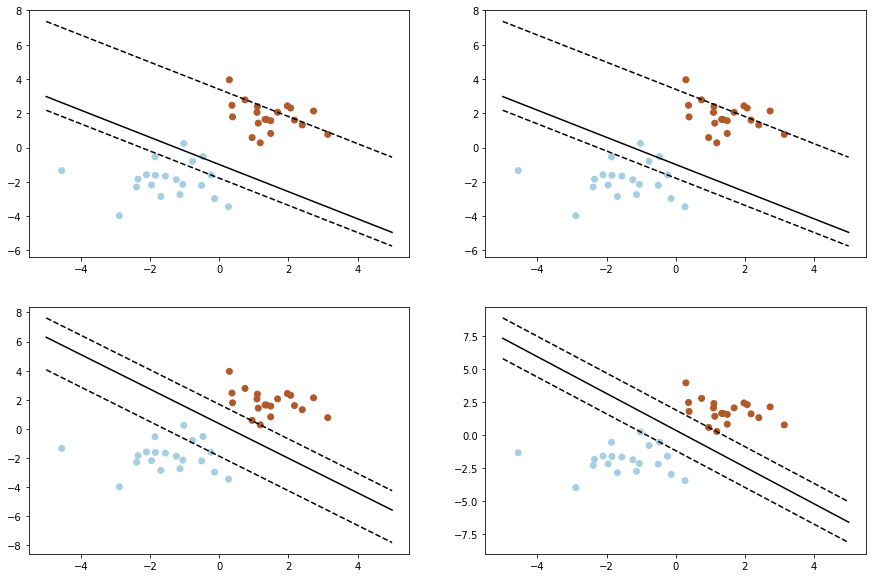

In [31]:
# Plota o hyperplano
def get_hyperplane(classifier):
    # get the separating hyperplane
    w = classifier.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (classifier.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    b = classifier.support_vectors_[0]
    yy_down = a * xx + (b[1] - a * b[0])
    b = classifier.support_vectors_[-1]
    yy_up = a * xx + (b[1] - a * b[0])
    
    return xx, yy, yy_down, yy_up, classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1]

x_0001, y_0001, ydown_0001, yup_0001, sv0001_0, sv0001_1 = get_hyperplane(clf_0001)
x_001, y_001, ydown_001, yup_001, sv001_0, sv001_1 = get_hyperplane(clf_001)
x_01, y_01, ydown_01, yup_01, sv01_0, sv01_1 = get_hyperplane(clf_01)
x_1, y_1, ydown_1, yup_1, sv1_0, sv1_1 = get_hyperplane(clf_1)


plt.clf()
plt.figure(figsize=(15,10))
plt.subplot(221)
# plot the line, the points, and the nearest vectors to the plane
plt.plot(x_0001, y_0001, 'k-')
plt.plot(x_0001, ydown_0001, 'k--')
plt.plot(x_0001, yup_0001, 'k--')
plt.scatter(sv0001_0, sv0001_1, s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.axis('tight')

plt.subplot(222)
plt.plot(x_001, y_001, 'k-')
plt.plot(x_001, ydown_001, 'k--')
plt.plot(x_001, yup_001, 'k--')
plt.scatter(sv001_0, sv001_1, s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.axis('tight')

plt.subplot(223)
plt.plot(x_01, y_01, 'k-')
plt.plot(x_01, ydown_01, 'k--')
plt.plot(x_01, yup_01, 'k--')
plt.scatter(sv01_0, sv01_1, s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.axis('tight')

plt.subplot(224)
plt.plot(x_1, y_1, 'k-')
plt.plot(x_1, ydown_1, 'k--')
plt.plot(x_1, yup_1, 'k--')
plt.scatter(sv01_0, sv01_1, s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.axis('tight')

plt.show()

Observer que quando menor o valor de C, menos rígida fica a separação dos dados. Os modelos com valores de C menor possuem menor valor de acurácia na base de treinamento.

In [32]:
print("C = 0.0001", "%0.6f" % clf_0001.score(X, Y))
print("C = 0.001", "%0.6f" %clf_001.score(X, Y))
print("C = 0.01", "%0.6f" %clf_01.score(X, Y))
print("C = 0.1", "%0.6f" %clf_1.score(X, Y))

C = 0.0001 0.950000
C = 0.001 0.950000
C = 0.01 1.000000
C = 0.1 1.000000


Um outro parâmetro que podemos modificar é o *kernel*. De forma geral (bem geral), podemo definir o kernel como uma função que permite transformar dados que estão em uma dimensão **n** para uma dimensão **m**, onde, normalmente, **m** é muito maior do que **n**. Foi exatamente isso que a gente fez nas transformações mostradas no início desse tutorial. O grande problema é que encontrar essa nova dimensão é relativamente custosa. O *kernel* nos fornece um atalho para que possamos realizar estes cálculos de forma mais simples e eficiente. 

Uma boa discussão sobre o que é um *kernel* pode ser encontrado [neste link](https://www.quora.com/What-are-Kernels-in-Machine-Learning-and-SVM) do Quora. Particulamente, gosto da resposta a seguir:

> by Lili Jiang, Data Scientist at Quora at Updated Oct 9, 2016 

> **Briefly speaking** , a kernel is a shortcut that helps us do certain calculation faster which otherwise would involve computations in higher dimensional space.

> **Mathematical definition:** $K(x, y) = <f(x), f(y)>$. Here $K$ is the kernel function, $x$, $y$ are $n$ dimensional inputs. $f$ is a map from n-dimension to m-dimension space. $<x,y>$ denotes the dot product. Usually $m$ is much larger than $n$.

> **Intuition:** normally calculating $<f(x), f(y)>$ requires us to calculate $f(x)$, $f(y)$ first, and then do the dot product. These two computation steps can be quite expensive as they involve manipulations in $m$ dimensional space, where $m$ can be a large number. But after all the trouble of going to the high dimensional space, the result of the dot product is really a scalar: we come back to one-dimensional space again! Now, the question we have is: do we really need to go through all the trouble to get this one number? do we really have to go to the m-dimensional space? The answer is no, if you find a clever kernel.

> **Simple Example:** $x = (x1, x2, x3); y = (y1, y2, y3)$. Then for the function $f(x) = (x1x1, x1x2, x1x3, x2x1, x2x2, x2x3, x3x1, x3x2, x3x3)$, the kernel is $K(x, y ) = (<x, y>)^2$.
> Let's plug in some numbers to make this more intuitive: suppose $x = (1, 2, 3); y = (4, 5, 6)$. Then:
> $f(x) = (1, 2, 3, 2, 4, 6, 3, 6, 9)$
> $f(y) = (16, 20, 24, 20, 25, 30, 24, 30, 36)$
> $<f(x), f(y)> = 16 + 40 + 72 + 40 + 100+ 180 + 72 + 180 + 324 = 1024$
> A lot of algebra. Mainly because f is a mapping from 3-dimensional to 9 dimensional space.
> Now let us use the kernel instead: 
> K(x, y) = (4 + 10 + 18 ) ^2 = 32^2 = 1024
> Same result, but this calculation is so much easier.

> **Additional beauty of Kernel:** kernels allow us to do stuff in infinite dimensions! Sometimes going to higher dimension is not just computationally expensive, but also impossible. f(x) can be a mapping from n dimension to infinite dimension which we may have little idea of how to deal with. Then kernel gives us a wonderful shortcut.

> **Relation to SVM:**  now how is related to SVM? The idea of SVM is that $y = w \phi(x)+b$, where $w$ is the weight, $\phi$ is the feature vector, and $b$ is the bias. if $y > 0$, then we classify datum to class 1, else to class 0. We want to find a set of weight and bias such that the margin is maximized. Previous answers mention that kernel makes data linearly separable for SVM. I think a more precise way to put this is, kernels do not make the the data linearly separable. The feature vector $\phi(x)$ makes the data linearly separable. Kernel is to make the calculation process faster and easier, especially when the feature vector $\phi$ is of very high dimension (for example, $x1, x2, x3, ..., x_D^n, x1^2, x2^2, ...., x_D^2$).

> **Why it can also be understood as a measure of similarity:** if we put the definition of kernel above, $<f(x), f(y)>$, in the context of SVM and feature vectors, it becomes $<\phi(x), \phi(y)>$. The inner product means the projection of $\phi(x)$ onto $\phi(y)$. or colloquially, how much overlap do $x$ and $y$ have in their feature space. In other words, how similar they are.

O scikit-learn possui algumas funções de *kernel* disponíveis: *‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable*. Vamos analisar o linear e o rbf ( indicado para dados que não são linearmente separáveis).

Considere a base de dados a seguir e analise a influência dos difentes *kernels* na acurácia final do modelo.

In [33]:
data = pd.read_csv("https://dl.dropboxusercontent.com/u/25405260/dataset/manwoman.csv", sep=";")
data.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


Plotando os dados:

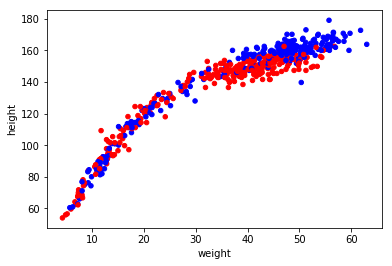

In [34]:
colors = {0:'red', 1:'blue'}

# Plotagem dos valores da base de treinamento
data.plot(kind='scatter', x='weight', y='height',c=data['male'].apply(lambda x: colors[x])) 

X = data[['weight','height']]
y = data.male

### Kernel Linear versus Kernel RBF

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# fit the model
clf = svm.SVC(kernel='linear')
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print("Acurácia 10 folds kernel linear: ", scores.mean())

Acurácia 10 folds kernel linear:  0.573447684391


In [36]:
# fit the model
clf = svm.SVC(kernel='rbf')
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print("Acurácia 10 folds kernel rbf: ", scores.mean())

Acurácia 10 folds kernel rbf:  0.712864493997


É fácil ver que os dados que estamos trabalhando não são linearmente separáveis. Por conta disso, um *kernel* mais apropriado a este tipo de dado como o *RBF* é mais indicado.

### Relação do C com a acurácia no Treino e Teste

O propósito de termos uma fronteira de decisão mais suave é poder deixar o modelo menos "rígido" e, provavelmente, torna-lo mais geral quando testado na base de testes. Vamos mostrar um pouco disso no exemplo a seguir.

**Primeiro com C = 1:**

In [37]:
# fit the model
clf = svm.SVC(kernel='rbf', C=1, random_state=4)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=4)
clf.fit(X_train,Y_train)
print("Acc no Treino: ", clf.score(X_train, Y_train))
print("Acc no Teste: ", clf.score(X_test, Y_test))

Acc no Treino:  0.868965517241
Acc no Teste:  0.715596330275


In [38]:
# fit the model
clf = svm.SVC(kernel='rbf', C=100, random_state=4)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=4)
clf.fit(X_train,Y_train)
print("Acc no Treino: ", clf.score(X_train, Y_train))
print("Acc no Teste: ", clf.score(X_test, Y_test))

Acc no Treino:  0.983908045977
Acc no Teste:  0.651376146789


In [39]:
# fit the model
clf = svm.SVC(kernel='rbf', C=0.2, random_state=4)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=4)
clf.fit(X_train,Y_train)
print("Acc no Treino: ", clf.score(X_train, Y_train))
print("Acc no Teste: ", clf.score(X_test, Y_test))

Acc no Treino:  0.836781609195
Acc no Teste:  0.752293577982


**Resumindo:**

|  C  | Acc Treino | Acc Teste | 
|------|------|------|
|   1  | 0.868965517241 | 0.715596330275 |
| 100  | 0.983908045977 | 0.651376146789 |
| 0.2  | 0.836781609195 | 0.752293577982 |

Observe que com C muito alto, a acurácia de treino é muito alta. No entanto, a acurácia na base de teste não acompanha esses valores no treino. Já quando o C é menor, a acurácia na base de treino cai, mas a acurácia em teste aumenta. O fato de termos uma fronteira de decisão mais suave, permite que o modelo não fique tão específico a base de treino, perdendo em generalização na base de teste.

Bom é isso pessoal. Agora é aplicar estes conceitos no exercício correspondente. 

**Até o próximo tutorial ;)**